<a href="https://colab.research.google.com/github/jupareto/ENG1111/blob/main/Utilizacao_rede_neural_rede_integracao_site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import  drive

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img


In [ ]:
# BAIXANDO BIBLIOTECA ANVIL
!pip3 install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 1.2 MB/s 
     |████████████████████████████████| 51 kB 90 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=b685091350777d03df8cc6989c97cc0155e607f29672d6ba6a20f077eba6bf1f
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


In [ ]:
# CONECTANDO SITE AO NOTEBOOK POR MEIO DA BIBLIOTECA ANVILL
import anvil.server

anvil.server.connect("5FM6ABA2H4SUMPDEF7NULS2M-Y7PYRWNUZNSPYQ5A")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
# DEFININDO O CAMINHO E A LISTA DE RÓTULOS PARA CLASSIFICAÇÃO DO LIXO

drive.mount('/drive')
train_dir = os.path.join('/drive/MyDrive/archive/Garbage classification/Garbage classification')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

Mounted at /drive


In [ ]:
# IMPORTANDO OS PESOS DA REDE NEURAL TREINADA ANTERIORMENTE
new_model = tf.keras.models.load_model('/drive/MyDrive/saved_model/my_model')

# CHECANDO ARQUITETURA DO MODELO
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 382, 510, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 380, 508, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 380, 508, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 190, 254, 32)     0         
 )                                                               
                                                        

1/1 [==============================] - 1s 864ms/step


Text(0.5, 1.0, 'Pred: paper')

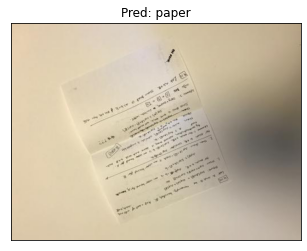

In [ ]:
# TESTE DA FUNÇÃO ANTES DE INTEGRAR COM O SITE
path = os.path.join('/drive/MyDrive/Teste.jpg')
img = mpimg.imread(path)
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = new_model.predict(np.vstack([x]))
pred = labels[np.argmax(classes)]

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Pred: {}'.format(pred))

In [ ]:
# TESTAGEM DA REDE NEURAL COM UPLOAD DE ARQUIVO A PARTIR DO SITE

#IMPORTAÇÃO DA BIBLIOTECA PARA UPLOAD DE IMAGENS
import anvil.media

#COMANDO DO SISTEMA PARA CHAMAR FUNCAO A PARTIR DE UM COMANDO EXECUTADO NO SITE
@anvil.server.callable

#FUNCAO CHAMADA PELO SITE COM FILE SENDO O PARAMETRO RECEBIDO

#NO CASO FILE É A IMAGEM PASSADA PELO USUARIO NO SITE
def classify_image(file):
  with anvil.media.TempFile(file) as f:
    img = load_img(f)
  #PROCESSAMENTO DA IMAGEM E INTERPRETAÇÃO PELA REDE NEURAL  
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  classes = new_model.predict(np.vstack([x]))
  pred = labels[np.argmax(classes)]

  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.title('Pred: {}'.format(pred))

  return pred

1/1 [==============================] - 0s 327ms/step


KeyboardInterrupt: ignored

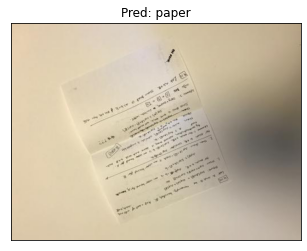

In [ ]:
# MANTEM O CÓDIGO RODANDO ENQUANTO UTILIZAMOS O SITE
anvil.server.wait_forever()